### Part A

###### Goal : Investigate the performance of a number of machine learning procedures on "CE802_P2_Data.csv" dataset. Perform a comparative study of the following machine learning procedures: a Decision Tree classifier; at least two more ML technique to predict the target label.

In [3]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The default value of numeric_only in DataFrame.corr is deprecated.")

# Changing numpy settings so that it prints arrays without truncation.
np.set_printoptions(threshold=np.inf)

# Loading the data
df = pd.read_csv("CE802_P2_Data.csv")

# quick look to data
#Print the first 5 rows of the dataframe.
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,2.3940,-1.43115,9179.010,-4.9938,0.04,-58.920,7.47300,15.4092,-2141.76,0,...,-2702.480,-3649.27,-18.32292,3501.20,-2.1548,8.81386,16357.41,0,NaN,True
1,0.5664,-2.68900,4746.810,-4.6814,2.04,-47.240,4.04138,20.9970,-1706.22,0,...,-2711.610,4355.41,-24.40800,3658.88,-1.8472,9.41560,12350.85,1,NaN,False
2,2.4700,-1.83630,10700.820,-6.2390,2.04,-15.010,4.49070,17.6670,-2513.25,0,...,-2667.090,-3277.69,-28.03500,3864.30,-3.3380,8.85640,11482.11,0,NaN,True
3,2.3440,-1.53890,10553.667,-5.0865,2.04,-28.216,4.20100,15.1653,-2207.67,1,...,-2723.120,-2058.59,-32.24400,2182.80,-2.7810,17.18800,12662.52,1,NaN,True
4,7.8060,-2.22850,6456.810,-4.7637,2.04,-45.620,6.61200,15.5268,507.78,1,...,-2730.335,-3813.58,-18.67800,3246.40,-1.1024,9.57960,12121.71,1,-11.44,False


###### Basic Exploratory Data Analysis (EDA) and statistical analysis

In [6]:
# summary of statistics
df.info(verbose=True)
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   int64  
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   int64  
 19  F20     500 non-null    float64
 20  Class   1000 non-null   bool   
dtypes: bool(1), float64(18), int64(2)
memo

,count,mean,std,min,25%,50%,75%,max
F1,1000.0,2.175746,1.805525,0.26440,0.832950,1.60740,2.968500,9.244000
F2,1000.0,-2.180605,0.606601,-5.21400,-2.515750,-2.04235,-1.696800,-1.420056
F3,1000.0,9930.685469,2108.672583,-4514.19000,9650.685000,10345.74000,10774.042500,21120.810000
F4,1000.0,-5.558608,0.901204,-9.17500,-5.927000,-5.27725,-4.881825,-4.622990
F5,1000.0,1.054000,1.000402,0.04000,0.040000,2.04000,2.040000,2.040000
F6,1000.0,-32.804599,20.571395,-176.06000,-38.405000,-26.66400,-18.884000,-12.504656
F7,1000.0,5.015266,0.899919,4.04138,4.313575,4.72480,5.498250,8.442000
F8,1000.0,16.453075,2.609035,13.68666,14.499975,15.68715,17.608500,27.225000
F9,1000.0,-2165.320822,739.616151,-7087.92000,-2426.043750,-2326.83000,-2124.907500,2605.080000
F10,1000.0,0.516000,0.499994,0.00000,0.000000,1.00000,1.000000,1.000000


In [7]:
# A value of zero does not make sense and thus indicates missing value.
# Following columns or variables have an invalid zero value:F10 and F19.
# Replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df_copy = df.copy(deep = True)
df_copy[['F10','F19']] = df_copy[['F10','F19']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10      484
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19      492
F20      500
Class      0
dtype: int64


###### Data Visualisation

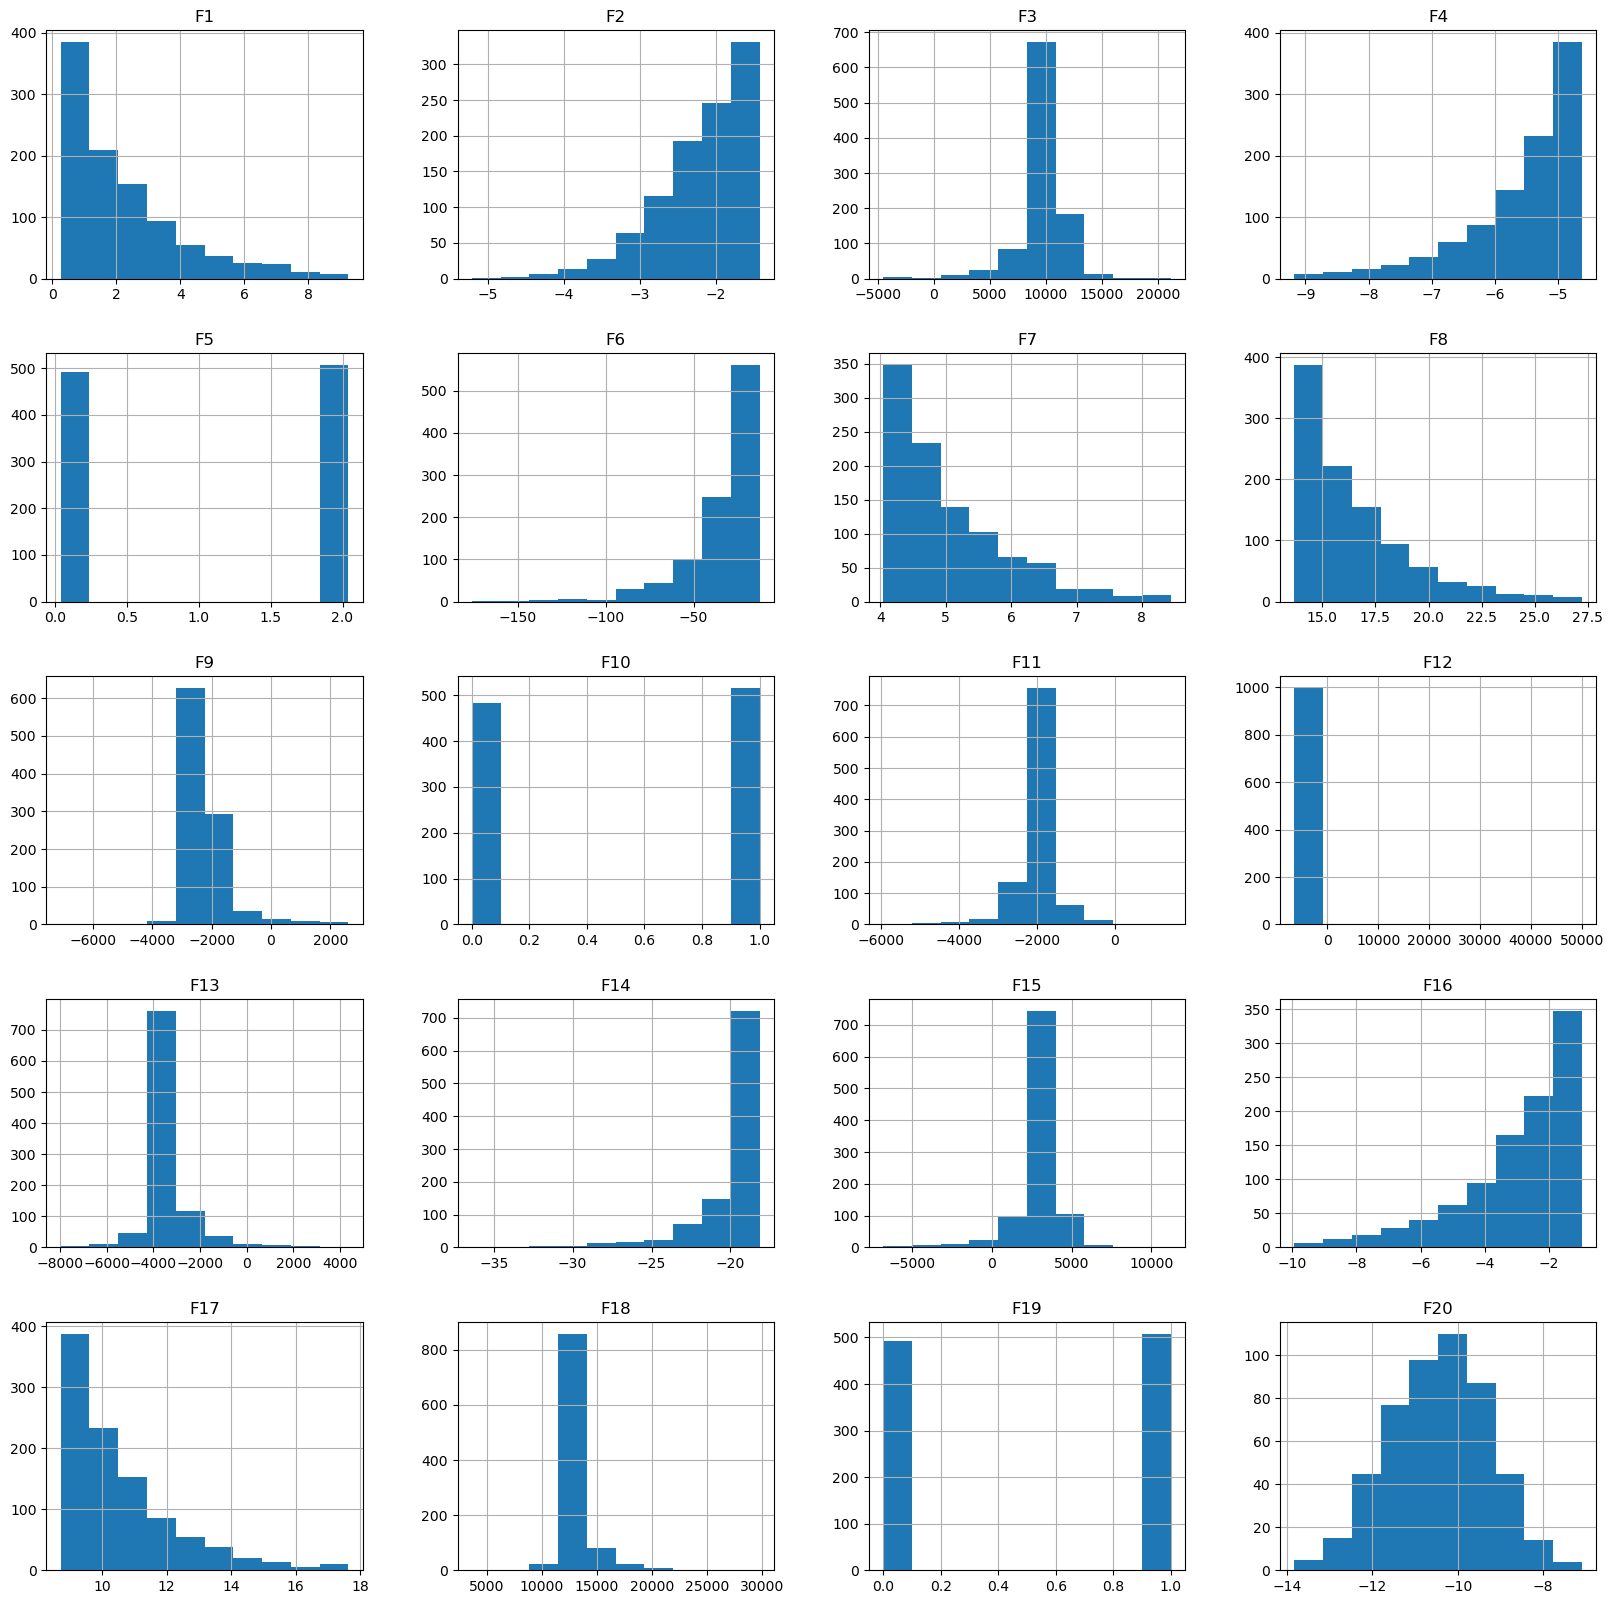

In [8]:
# To fill these Nan values the data distribution needs to be understood
p = df.hist(figsize = (20,20))

In [10]:
#Aiming to impute nan values for the columns in accordance with their distribution
df_copy['F10'].fillna(df_copy['F10'].mean(), inplace = True)
df_copy['F19'].fillna(df_copy['F19'].mean(), inplace = True)
df_copy['F20'].fillna(df_copy['F20'].mean(), inplace = True)

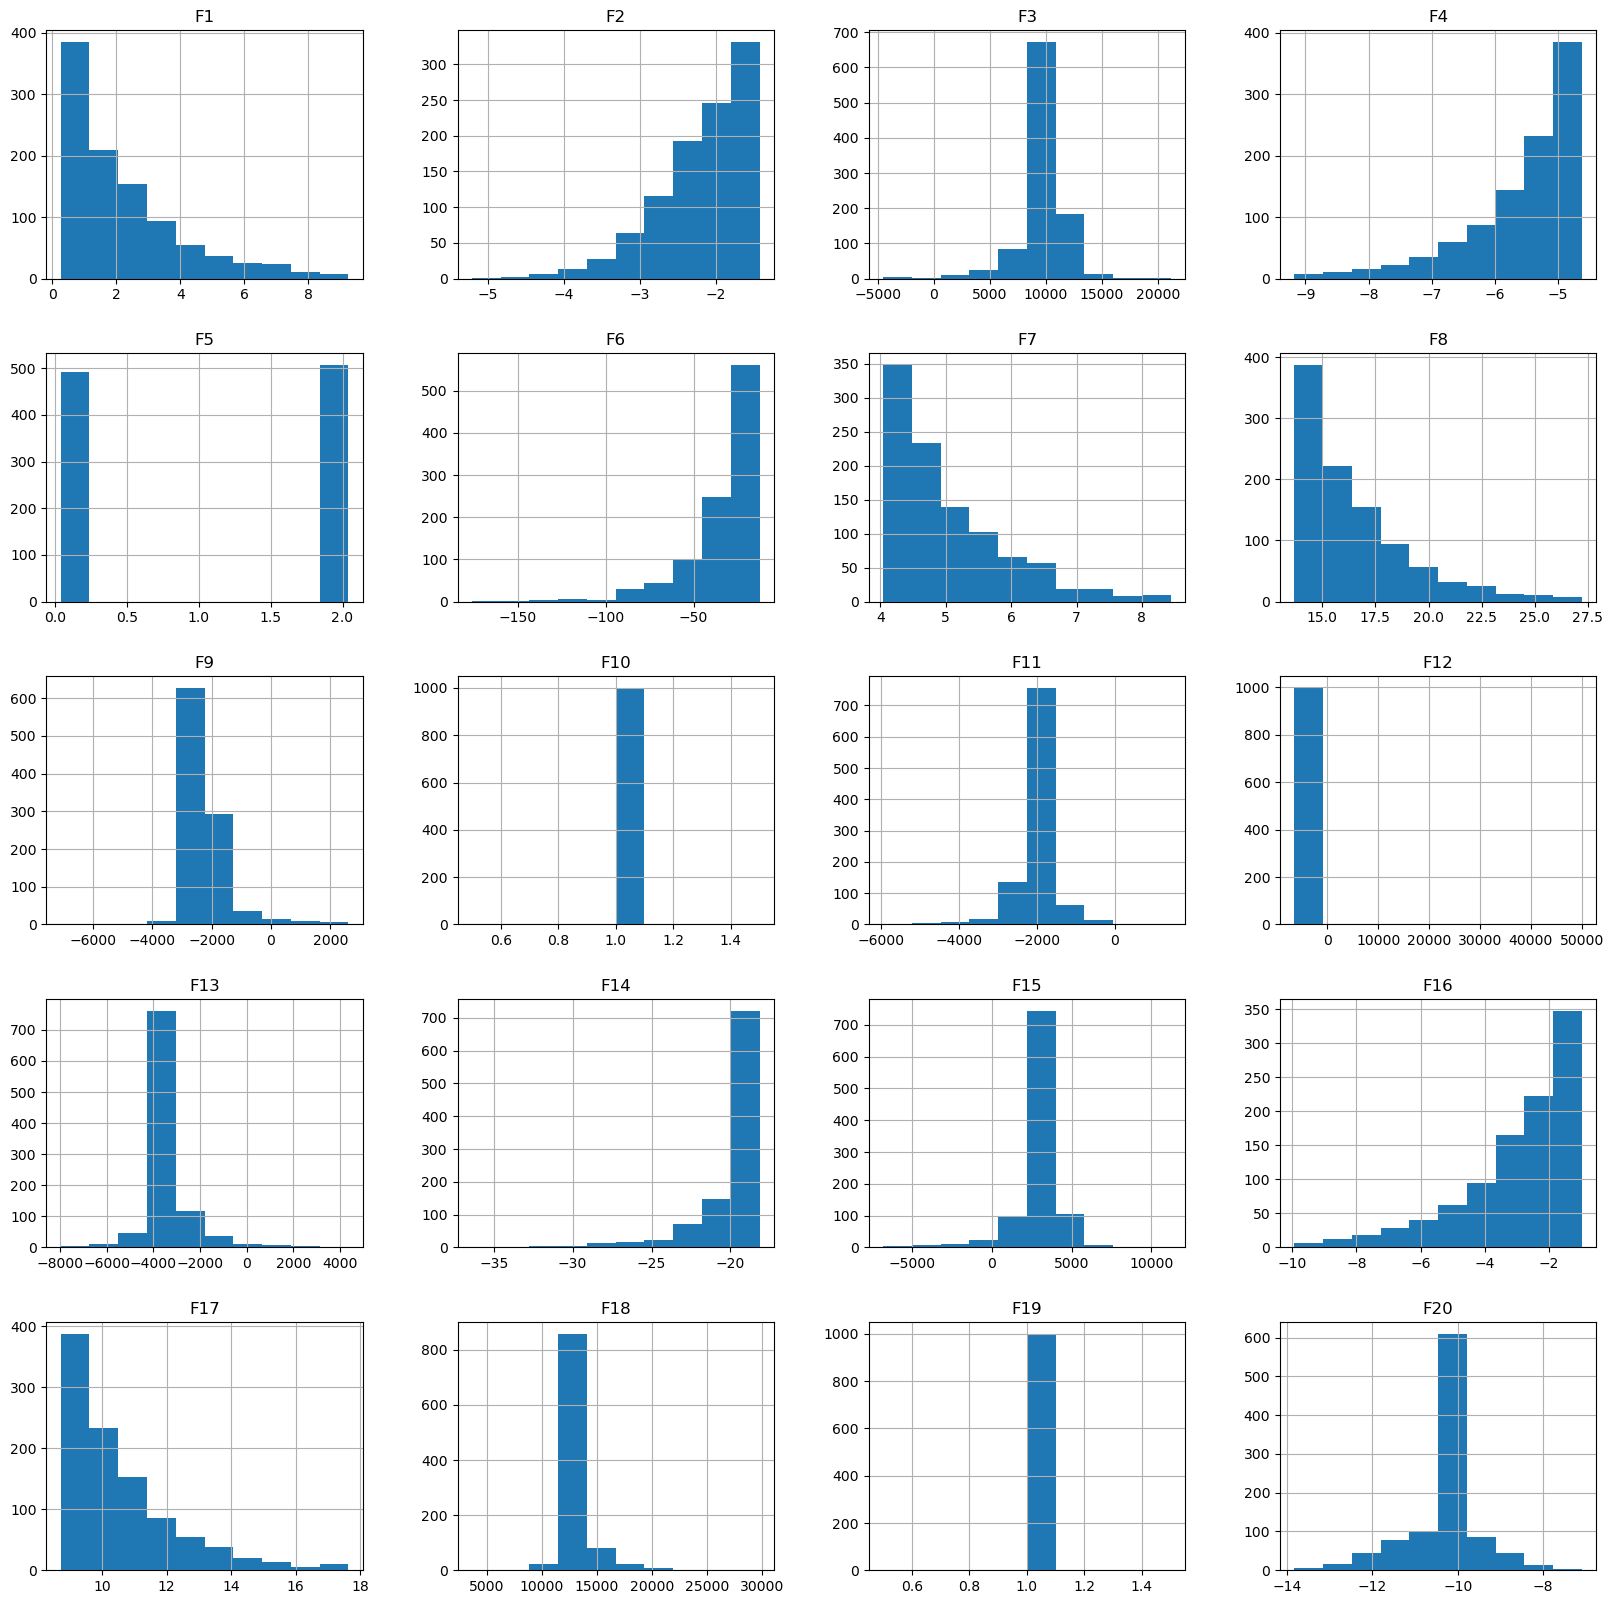

In [11]:
#Plotting after Nan removal
p = df_copy.hist(figsize = (20,20))

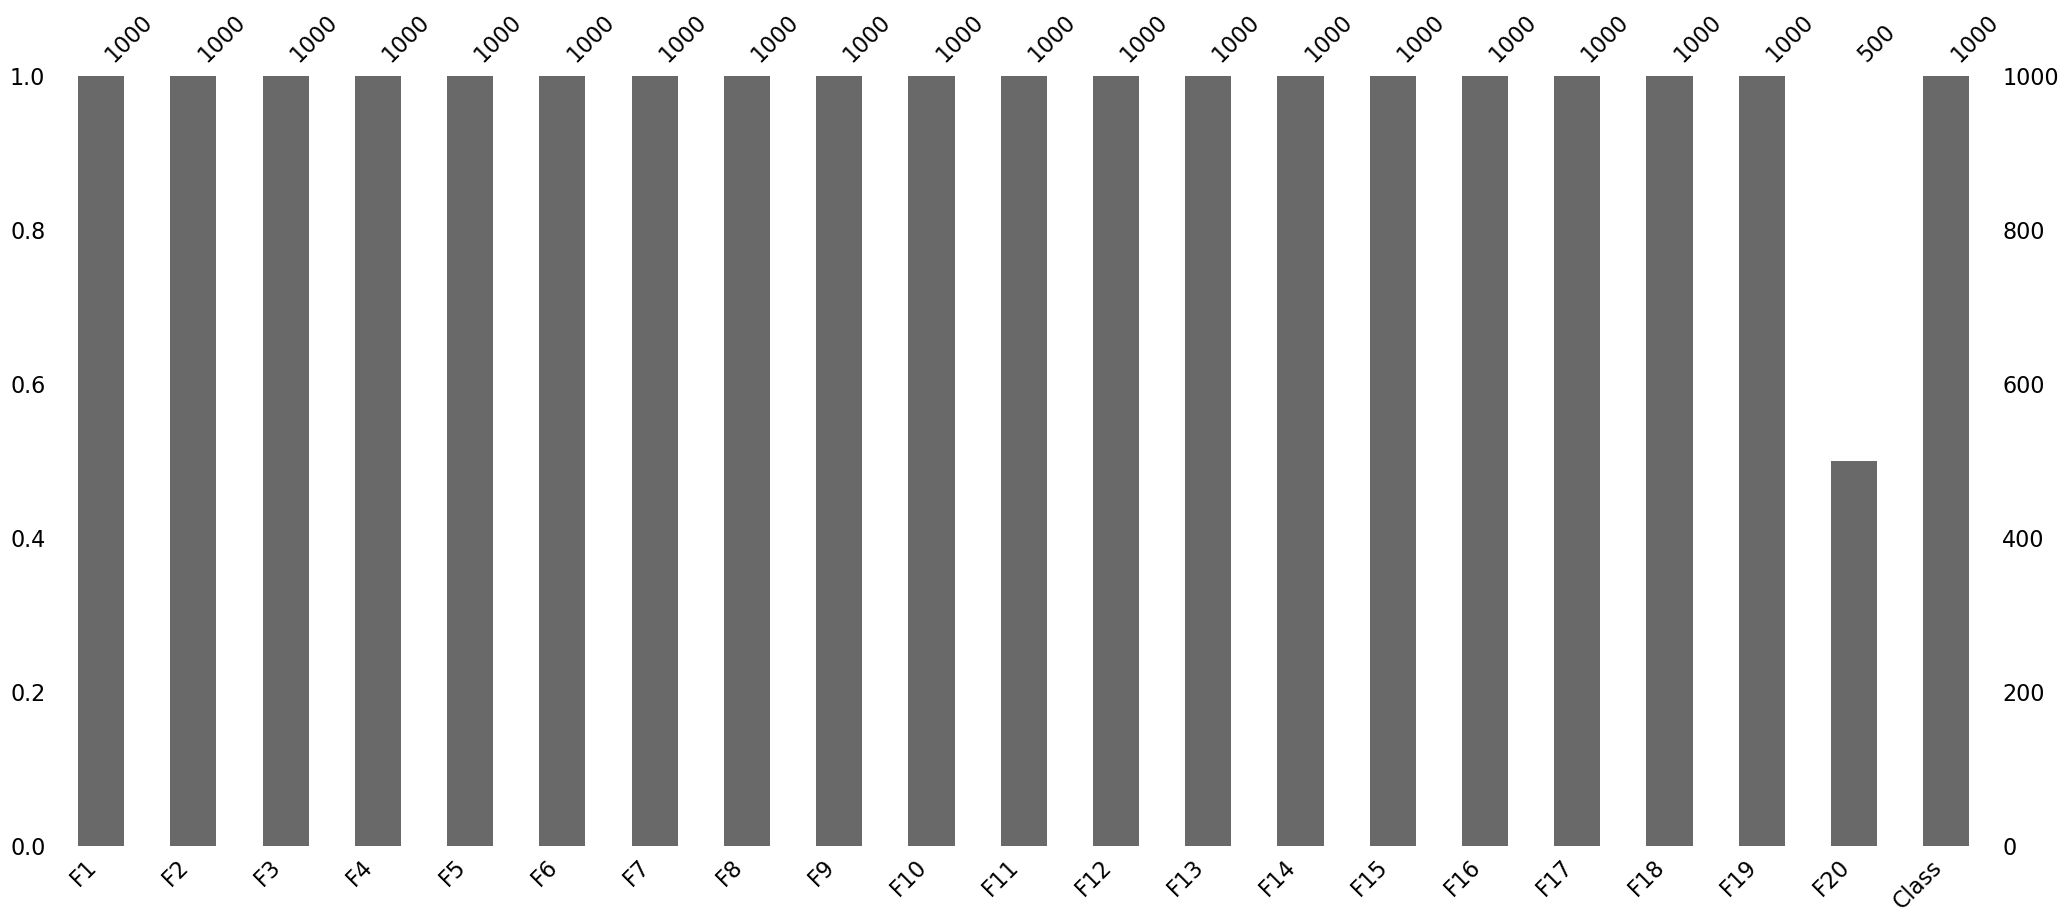

In [18]:
## null count analysis
!pip install missingno
import missingno as msno
p=msno.bar(df)

True     502
False    498
Name: Class, dtype: int64


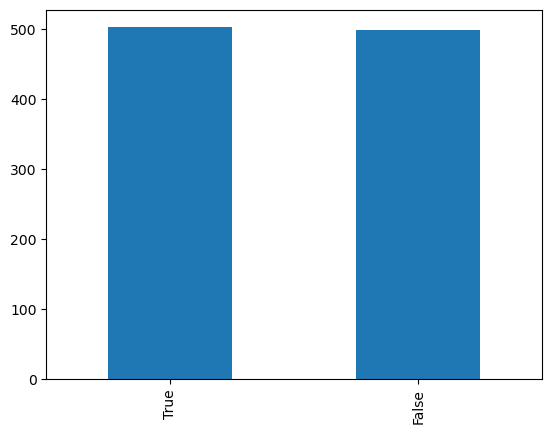

In [19]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["Class"].map(lambda x: color_wheel.get(x + 1))
print(df.Class.value_counts())
p=df.Class.value_counts().plot(kind="bar")

###### The above graph shows that the data is higher towards datapoints having outcome value as True where it means that diabetes was present actually.The number of Diabetics is 498.

###### Missing values

In [21]:
#check for missing values
df.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      500
Class      0
dtype: int64

###### To address the missing feature problem, we need to first try to understand the nature of the missing data.

###### Imputing the missing data: We would consider techniques such as mean imputation, median imputation, or k-Nearest Neighbor imputation. Mean and median imputation are simple methods that replace missing values with the mean or median value of the non-missing values in the same feature. k-NN imputation is a more sophisticated method that replaces missing values with the average of the k closest non-missing values in the same feature.

###### Experimentation of different Imputation methods

In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define classifiers
dt_clf= DecisionTreeClassifier(criterion='gini')
knn_clf = KNeighborsClassifier(n_neighbors=5)
gb_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=10)
rf_clf = RandomForestClassifier()


# Split dataset into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of imputation strategies to try
strategies = ['mean', 'median', 'most_frequent', 'knn']

# Define a list of models to try
models = [
    dt_clf,
    knn_clf,
    gb_clf,
    rf_clf,
]

# Define a dictionary to store accuracy scores
accuracy_scores = {'Strategy': [], 'Model': [], 'Accuracy': []}

# Iterate over the different strategies and models and compare their performance
for strategy in strategies:
    # Perform imputation on the training set
    if strategy == 'knn':
        imputer = KNNImputer()
    else:
        imputer = SimpleImputer(strategy=strategy)
    X_train_imputed = imputer.fit_transform(X_train)
    
    for model in models:
        # Train the model on the imputed training set
        model.fit(X_train_imputed, y_train)
        
        # Perform imputation on the testing set
        X_test_imputed = imputer.transform(X_test)
    
        # Make predictions on the imputed testing set
        y_pred = model.predict(X_test_imputed)
    
        # Evaluate the performance of the model using accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store accuracy score in dictionary
        accuracy_scores['Strategy'].append(strategy)
        accuracy_scores['Model'].append(model.__class__.__name__)
        accuracy_scores['Accuracy'].append(accuracy)

# Convert accuracy scores to dataframe and print as table
accuracy_scores_df = pd.DataFrame(accuracy_scores)
print(accuracy_scores_df.to_markdown(index=False))

| Strategy      | Model                      |   Accuracy |
|:--------------|:---------------------------|-----------:|
| mean          | DecisionTreeClassifier     |      0.875 |
| mean          | KNeighborsClassifier       |      0.675 |
| mean          | GradientBoostingClassifier |      0.905 |
| mean          | RandomForestClassifier     |      0.89  |
| median        | DecisionTreeClassifier     |      0.845 |
| median        | KNeighborsClassifier       |      0.675 |
| median        | GradientBoostingClassifier |      0.905 |
| median        | RandomForestClassifier     |      0.895 |
| most_frequent | DecisionTreeClassifier     |      0.88  |
| most_frequent | KNeighborsClassifier       |      0.675 |
| most_frequent | GradientBoostingClassifier |      0.9   |
| most_frequent | RandomForestClassifier     |      0.88  |
| knn           | DecisionTreeClassifier     |      0.865 |
| knn           | KNeighborsClassifier       |      0.675 |
| knn           | GradientBoostingClassi

###### Based on the accuracy values in the table, it appears that the best strategy varies depending on the model being used. However, the 'most_frequent' strategy resulted in the highest accuracy score for the RandomForestClassifier, while the 'knn' strategy resulted in the highest accuracy score for the DecisionTreeClassifier.

In [25]:
#Since Feature F20 has 500 missing values. Check if there are any unique values in F20

print(df['F20'].nunique())

302


###### Based on this analysis, discarding the feature altogether could result in a significant loss of information since the missing data here is 500 and is a significant percentage of the dataset.

###### Since discarding the feature is not an option, we would consider imputing the missing data using 'knn' strategy for column F20

In [26]:
from sklearn.impute import KNNImputer
# impute missing values with KNN imputation
imputer = KNNImputer(n_neighbors=5)
df['F20'] = imputer.fit_transform(df[['F20']])
# check for missing values again
print(df.isnull().sum())

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
Class    0
dtype: int64


In [27]:
# proportion of diabetes patients 
df.Class.value_counts()[1] / df.Class.count()

0.498

###### From the above we can see that about 50% having diabetes

###### Correlation Analysis of target column

In [28]:
#Correlation analysis of class column
corr_matrix = df.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class    1.000000
F13      0.229825
F18      0.219085
F4       0.059341
F1       0.034989
F17      0.033554
F3       0.023321
F5       0.021946
F9       0.019454
F6       0.015692
F16      0.010232
F11      0.009540
F7       0.005114
F8       0.003948
F15     -0.001967
F14     -0.008221
F19     -0.028068
F2      -0.029309
F12     -0.034526
F10     -0.036147
F20     -0.445196
Name: Class, dtype: float64

###### Heatmap

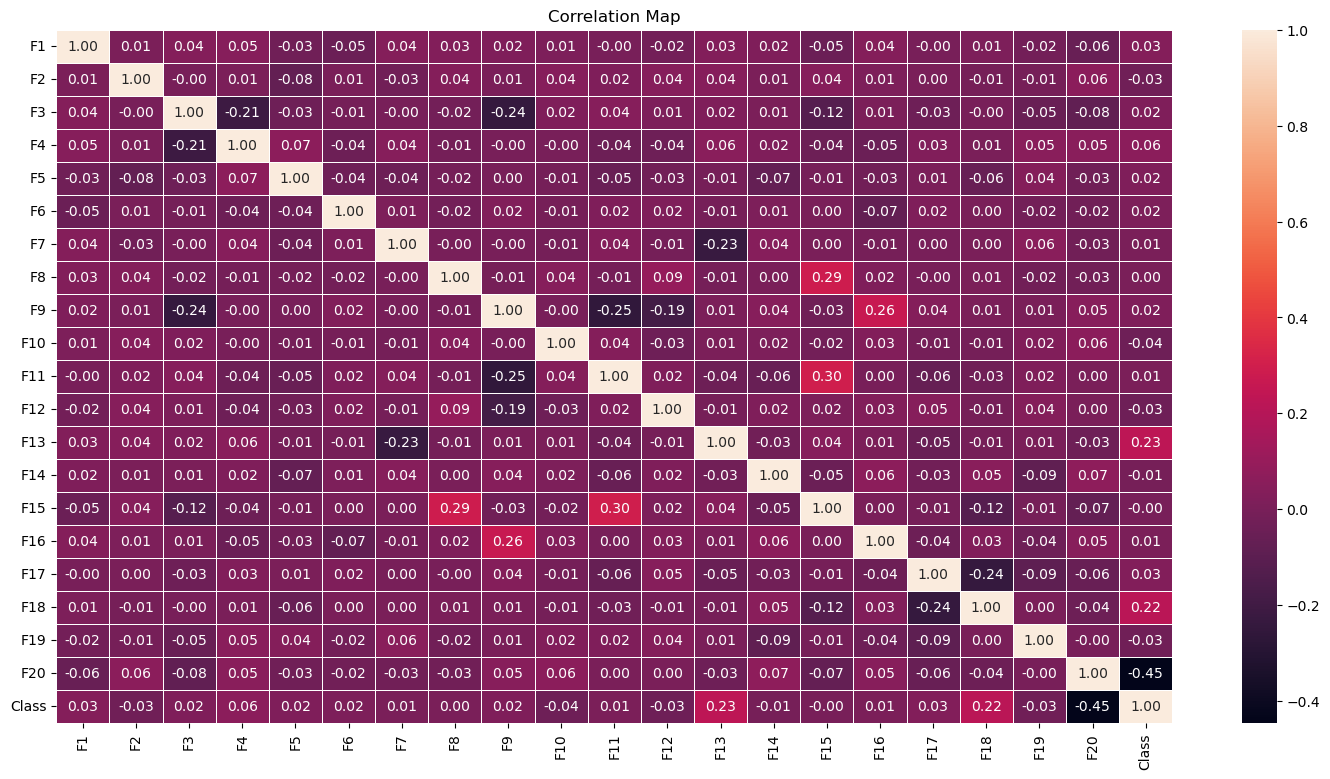

In [29]:
# heatmap of the data for checking the correlation between the features and class column.

f,ax=plt.subplots(figsize = (18,9))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('heatmap.png')
plt.show()

###### From the above Correlation matrix we can conclude that:- F11 and F15 have positive correlation with diabetes or Not of 30%. F18 has a positive correlation with diabetes or Not of 22%.

###### Declare feature vector and target variable

In [30]:
X, y = df.drop('Class', axis=1), df['Class']
print(X.shape, y.shape)

(1000, 20) (1000,)


###### Split data into train and validation sets

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [35]:
print("The shape of xtrain is: ",X_train.shape)
print("The shape of xtest is: ",X_test.shape)
print("The shape of ytrain is: ",y_train.shape)
print("The shape of ytest is: ",y_test.shape)

The shape of xtrain is:  (800, 20)
The shape of xtest is:  (200, 20)
The shape of ytrain is:  (800,)
The shape of ytest is:  (200,)


###### Making predictions using different machine learning models

DecisionTreeClassifier model accuracy:  78.50%  
             Classification_report 
              precision    recall  f1-score   support

       False       0.81      0.79      0.80       107
        True       0.76      0.78      0.77        93

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.79      0.79       200



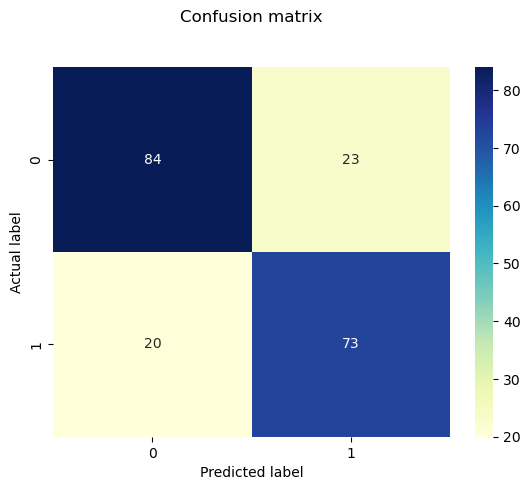

-------------------------------------------------------
             ROC Curve 
ROC AUC : 0.78


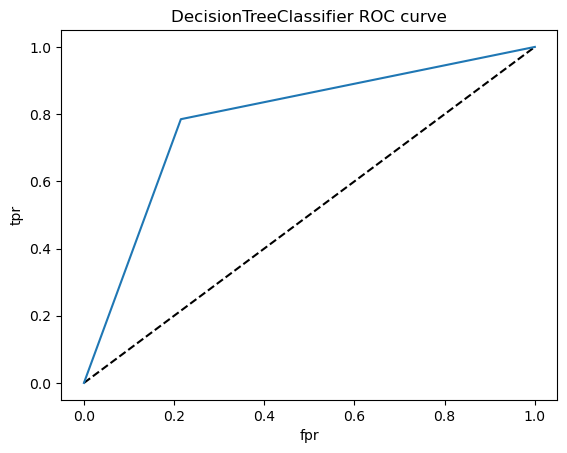

-------------------------------------------------------
KNeighborsClassifier model accuracy:  60.50%  
             Classification_report 
              precision    recall  f1-score   support

       False       0.63      0.64      0.64       107
        True       0.58      0.56      0.57        93

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



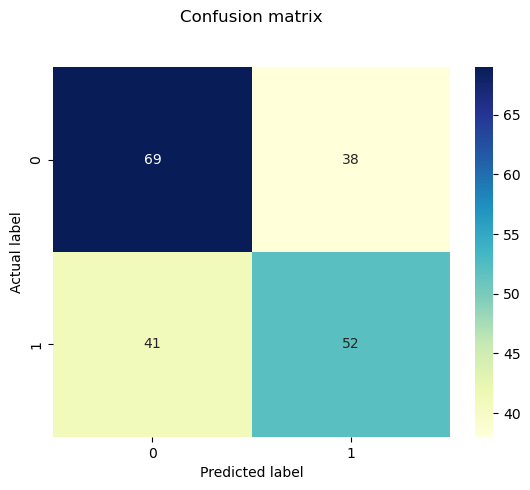

-------------------------------------------------------
             ROC Curve 
ROC AUC : 0.60


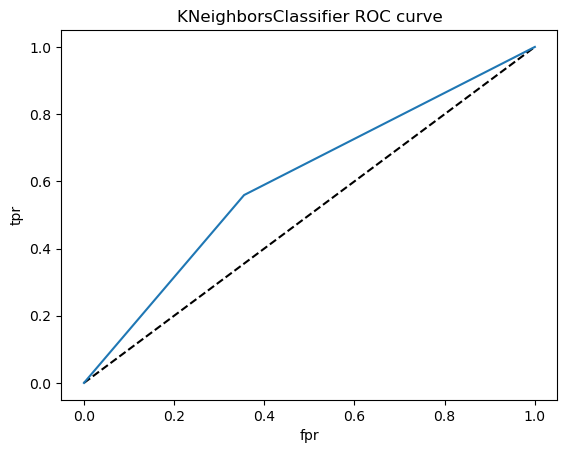

-------------------------------------------------------
GradientBoostingClassifier model accuracy:  89.00%  
             Classification_report 
              precision    recall  f1-score   support

       False       0.93      0.86      0.89       107
        True       0.85      0.92      0.89        93

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



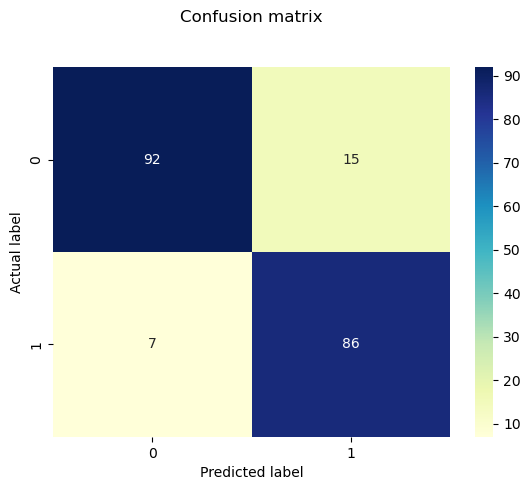

-------------------------------------------------------
             ROC Curve 
ROC AUC : 0.89


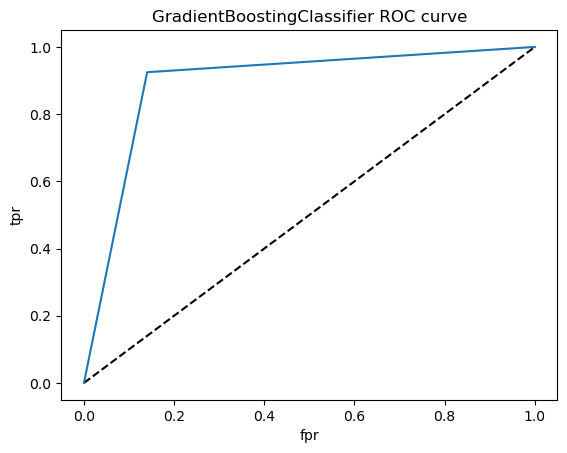

-------------------------------------------------------
RandomForestClassifier model accuracy:  83.50%  
             Classification_report 
              precision    recall  f1-score   support

       False       0.86      0.83      0.84       107
        True       0.81      0.84      0.83        93

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



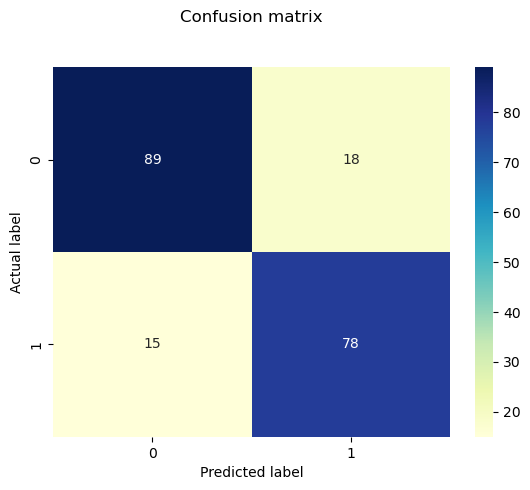

-------------------------------------------------------
             ROC Curve 
ROC AUC : 0.84


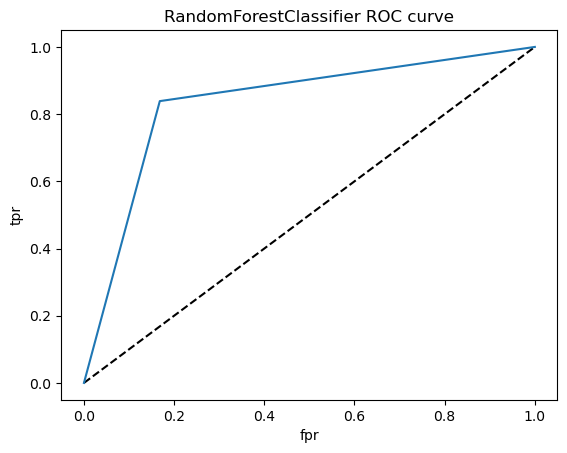

-------------------------------------------------------
            MODEL COMPARISON TABLE             
-------------------------------------------------------
Model Name		Accuracy
-------------------------------------------------------
DecisionTreeClassifier        	78.50%
KNeighborsClassifier          	60.50%
GradientBoostingClassifier    	89.00%
RandomForestClassifier        	83.50%
-------------------------------------------------------


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, results):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    results.append([str(classifier).split('(')[0], accuracy, report, matrix])

    print(f"{str(classifier).split('(')[0]} model accuracy:\033[32m \033[01m {accuracy:.2f}% \033[30m \033[0m")
    print('\033[01m             Classification_report \033[0m')
    print(report)
    plot_ = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    print("-------------------------------------------------------")
    print('\033[01m             ROC Curve \033[0m')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) 
    print('ROC AUC : %.2f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='Knn')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(f"{str(classifier).split('(')[0]} ROC curve")
    plt.show()
    print("-------------------------------------------------------")

classifiers = [
    dt_clf,
    knn_clf,
    gb_clf,
    rf_clf,
]

results = []
for clf in classifiers:
    evaluate_classifier(clf, X_train, y_train, X_test, y_test, results)
print("\033[01m            MODEL COMPARISON TABLE             \033[0m")
print("-------------------------------------------------------")
print("Model Name\t\tAccuracy")
print("-------------------------------------------------------")
for row in results:
    print(f"{row[0]:<30}\t{row[1]:.2f}%")
print("-------------------------------------------------------")


###### The highest accuracy in the 'MODEL COMPARISON' table is achieved by the GradientBoostingClassifier with an accuracy of 89.00%.The second highest accuracy was achieved by Random Forest Classifier with an accuracy of 83.50%

###### Finding the best parameters

###### Grid Search - Hypertuning for different models

In [41]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

def hypertune_and_fit(model, params, X_train, y_train, X_test, y_test):
    # Create a GridSearchCV object with the given parameters
    grd = GridSearchCV(estimator=model, param_grid=params, cv=3)

    # Fit the GridSearchCV object to the training data
    grd_model = grd.fit(X_train, y_train)

    # Create a new model with the best parameters
    new_model = model.__class__(**grd_model.best_params_)

    # Fit the new model to the training data
    new_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = new_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Return the new model and its accuracy
    return new_model, accuracy


# Define the parameter grids for each model
dt_params = [{'criterion': ['gini', 'entropy'],
              'max_depth': range(2, 5),
              'min_samples_leaf': range(2, 7)}]

rf_params = [{'n_estimators': [100, 150, 200],
              'criterion': ['gini', 'entropy'],
              'max_depth': range(2, 5),
              'min_samples_leaf': range(2, 7)}]

knn_params = [{'n_neighbors': [3, 5, 7],
               'metric': ['euclidean', 'manhattan']}]

gbm_params = [{'n_estimators': [50, 100, 150],
               'learning_rate': [0.05, 0.1, 0.15],
               'max_depth': [2, 3, 4]}]


# Initialize the models
dt = DecisionTreeClassifier()
gbm = GradientBoostingClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Hypertune and fit each model
models = []
model_names = []
accuracies = []

for model, params, name in [(dt, dt_params, 'Decision Tree'),
                            (knn, knn_params, 'KNN'),
                            (gbm, gbm_params, 'Gradient Boosting'),
                            (rf, rf_params, 'Random Forest')]:
    new_model, accuracy = hypertune_and_fit(model, params, X_train, y_train, X_test, y_test)
    models.append(new_model)
    model_names.append(name)
    accuracies.append(accuracy*100)

# Create a DataFrame to display the results
print("\033[01m            Model Performance Summary after Hyperparameter Tuning             \033[0m")
results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
print(results_df)


            Model Performance Summary after Hyperparameter Tuning             
               Model  Accuracy
0      Decision Tree      82.5
1                KNN      62.0
2  Gradient Boosting      87.0
3      Random Forest      86.0


###### We can see that the accuracy of Decision Tree and KNN Classifier is increased after using GridSearchCV technique with an accuracy of 82.5% and 62.00% respectively.The accuracy of Random Forest has also significantly increased to 86 %.Gradient boosting still has the highest accuracy of 87 % although it has dropped after hypertuning.Gradient boosting and Random Forest accuracies are varying by just 1 %. Adjusting hyperparameters is an important step in improving the performance of machine learning models.

###### Gradient Boosting appears to be the best model based on the findings of each model because it has a reasonably balanced combination of AUC and Recall scores and therefore will be used for predictions in Part B.

### Part B

###### Goal: Prediction on a hold-out test set.Produce produce class predictions of the records in the test set using one approach of your choice among those tested in task “a” (for example the one achieving the best performance). These data must not be used other than to test the algorithm trained on the training data.

In [43]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Preprocess the test data
# 1. Impute missing values
imputer = SimpleImputer(strategy='mean')
test_data = imputer.fit_transform(test_data)
# 2. Scale the features
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

# fit GradientBoostingClassifier on training set
gb_clf.fit(X_train, y_train)

predicted = gb_clf.predict(test_data)  # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])